In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris_path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"
df = pd.read_csv(iris_path)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

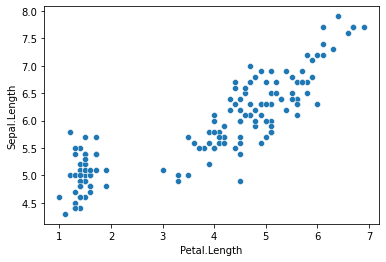

In [3]:
sns.scatterplot(data=df, x='Petal.Length', y='Sepal.Length')

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
data4d = df.iloc[:, :-1]
X4d_std = StandardScaler().fit_transform(data4d)

df4d_std = pd.DataFrame(data=X4d_std, columns=data4d.columns)
df4d_std['Species'] = df['Species']
df4d_std.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa


In [16]:
data2d = df.iloc[:, [0, 2]]
X2d_std = StandardScaler().fit_transform(data2d)

df2d_std = pd.DataFrame(data=X2d_std, columns=data4d.columns[[0, 2]])
df2d_std['Species'] = df['Species']
df2d_std.head(2)

,Sepal.Length,Petal.Length,Species
0,-0.900681,-1.340227,setosa
1,-1.143017,-1.340227,setosa


### kmeans con 3 clusters

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

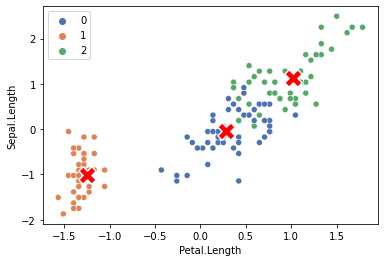

In [17]:
# Calculo kmeans
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(X4d_std)

# Construyo datafrae
df4d_std['kmeans'] = kmeans.labels_
clusters_4d = kmeans.cluster_centers_

# Ploteo
sns.scatterplot(data=df4d_std, x='Petal.Length', y='Sepal.Length', hue='kmeans', palette='deep')
sns.scatterplot(x=clusters_4d[:, 3], y=clusters_4d[:, 0], marker="X", color='r', s=300)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

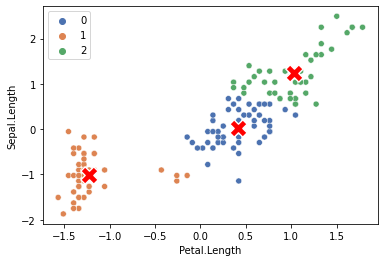

In [24]:
# Calculo kmeans
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters)
kmeans.fit(X2d_std)

# Construyo datafrae
df2d_std['kmeans'] = kmeans.labels_
clusters_2d = kmeans.cluster_centers_

# Ploteo
sns.scatterplot(data=df2d_std, x='Petal.Length', y='Sepal.Length', hue='kmeans', palette='deep')
sns.scatterplot(x=clusters_2d[:, 1], y=clusters_2d[:, 0], marker="X", color='r', s=300)

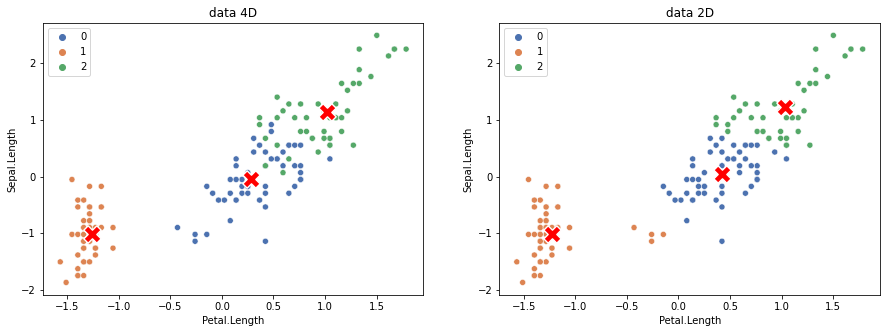

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df4d_std, x='Petal.Length', y='Sepal.Length', 
                hue='kmeans', palette='deep', ax=axes[0]).set_title('data 4D')
sns.scatterplot(x=clusters_4d[:, 3], y=clusters_4d[:, 0], marker="X", color='r', s=300, ax=axes[0])

sns.scatterplot(data=df2d_std, x='Petal.Length', y='Sepal.Length', 
                hue='kmeans', palette='deep', ax=axes[1]).set_title('data 2D')
sns.scatterplot(x=clusters_2d[:, 1], y=clusters_2d[:, 0], marker="X", color='r', s=300, ax=axes[1])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

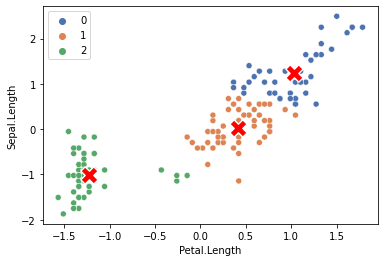

In [40]:
# Calculo kmeans
seeds = np.array([[2, 0], [2, -0.1], [2, -0.2]])
no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters, init=seeds)
kmeans.fit(X2d_std)

# Construyo datafrae
df2d_std['kmeans'] = kmeans.labels_
clusters_2d = kmeans.cluster_centers_

# Ploteo
sns.scatterplot(data=df2d_std, x='Petal.Length', y='Sepal.Length', hue='kmeans', palette='deep')
sns.scatterplot(x=clusters_2d[:, 1], y=clusters_2d[:, 0], marker="X", color='r', s=300)

In [41]:
kmeans.n_iter_

11

In [35]:
import numpy as np

In [44]:
df2d_std

,Sepal.Length,Petal.Length,Species,kmeans
0,-0.900681,-1.340227,setosa,2
1,-1.143017,-1.340227,setosa,2
2,-1.385353,-1.397064,setosa,2
3,-1.506521,-1.283389,setosa,2
4,-1.021849,-1.340227,setosa,2
...,...,...,...,...
145,1.038005,0.819596,virginica,0
146,0.553333,0.705921,virginica,1
147,0.795669,0.819596,virginica,0
148,0.432165,0.933271,virginica,1


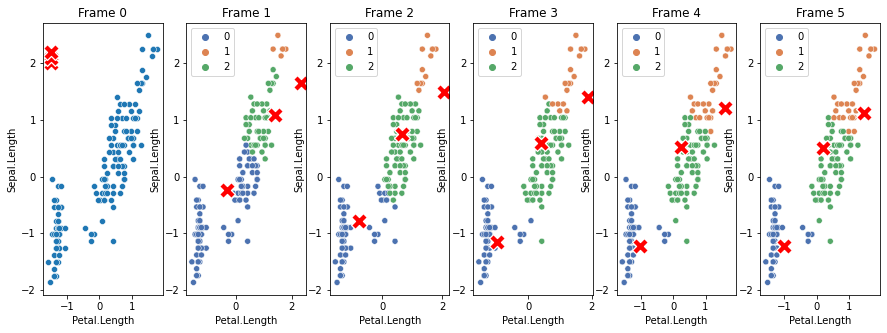

In [50]:
seeds = np.array([[-1.5, 2.0], [-1.5, 2.1], [-1.5, 2.2]])

frames = 6
fig, axes = plt.subplots(1, frames, figsize=(15, 5))

idx = 0
cluster_centers = seeds
sns.scatterplot(data=df2d_std, x='Petal.Length', y='Sepal.Length', 
                ax=axes[idx], palette='deep').set_title(f"Frame {idx}")
sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker="X", 
                   s=250, color='r', ax=axes[idx])
for idx in range(1, frames):
    kmeans = KMeans(n_clusters=3, max_iter=2*idx, init=seeds, n_init=1)
    kmeans.fit(X2d_std)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    # print(kmeans.n_iter_, cluster_centers)
    
    sns.scatterplot(data=df2d_std, x='Petal.Length', y='Sepal.Length', 
                    hue=labels, ax=axes[idx], palette='deep').set_title(f"Frame {idx}")
    sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker="X", 
                   s=250, color='r', ax=axes[idx])